In [74]:
import pandas as pd
import numpy as np
import rasterio as rio
import rasterio.plot
import sklearn
import sklearn.linear_model
import sklearn.svm

import matplotlib.pyplot as plt


In [173]:
predicts_coords = pd.read_csv('../data/01_raw/PREDICTs_coords.csv')
predicts_coords.set_index('SSBS', inplace=True)
predicts_coords.head()


,Unnamed: 0,SSB,MaxAbundance,TotalAbundance,RescaledAbundance,Sample_midpoint,Latitude,Longitude,Study_common_taxon,Predominant_land_use,Max_linear_extent_metres
SSBS,,,,,,,,,,,
AD1_2001__Liow 1 1,1,AD1_2001__Liow 1,242.0,42.0,0.173554,1999-05-01,1.351944,103.778611,Apidae,Primary vegetation,3000.0
AD1_2001__Liow 1 2,2,AD1_2001__Liow 1,242.0,242.0,1.000000,1999-04-25,1.354722,103.808056,Apidae,Mature secondary vegetation,3000.0
AD1_2001__Liow 1 3,3,AD1_2001__Liow 1,242.0,232.0,0.958678,1999-05-12,1.394722,103.811667,Apidae,Mature secondary vegetation,3000.0
AD1_2001__Liow 1 4,4,AD1_2001__Liow 1,242.0,185.0,0.764463,1999-06-16,1.326944,103.787222,Apidae,Intermediate secondary vegetation,1800.0
AD1_2001__Liow 1 5,5,AD1_2001__Liow 1,242.0,94.5,0.390496,1999-05-02,1.282778,103.803611,Apidae,Intermediate secondary vegetation,2000.0


In [174]:
encoded_tiles = pd.read_parquet('../data/03_primary/naip_encoded_chips.parquet')
print(len(encoded_tiles))
encoded_tiles = encoded_tiles.dropna()
encoded_tiles

1547


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
AD1_2005__Shuler 1 1,0.151142,0.066608,-0.079924,-0.068443,-0.062218,-0.115437,-0.097465,-0.033842,0.096967,0.048045,...,-0.084809,0.135795,-0.149457,-0.013389,0.133333,-0.117116,0.124806,0.015959,-0.036168,0.113881
AD1_2005__Shuler 1 10,0.170210,0.087144,-0.130559,-0.083868,-0.034387,-0.085084,-0.086711,-0.011204,0.150028,-0.035102,...,-0.125915,0.185337,-0.031312,0.036893,0.117959,-0.103385,-0.023791,-0.010722,0.364984,0.112738
AD1_2005__Shuler 1 11,0.166975,0.108718,-0.130969,0.153025,0.175671,-0.050281,0.021742,0.054687,0.083692,-0.126809,...,-0.134643,0.178287,0.104105,0.041391,0.172044,-0.046273,0.053536,0.015711,-0.114026,0.039696
AD1_2005__Shuler 1 12,0.142247,-0.025278,-0.122655,0.086914,0.025925,-0.047457,-0.077933,-0.025856,-0.012420,0.012256,...,-0.103601,0.416008,0.071180,0.007746,0.166492,-0.094403,0.062633,0.073149,0.048535,0.040547
AD1_2005__Shuler 1 13,0.165384,0.153960,-0.212705,-0.044264,-0.076330,-0.057729,-0.094504,0.046311,-0.103711,0.013503,...,0.013519,0.246355,0.096336,0.073293,0.085965,-0.094301,0.038832,0.050199,0.223398,0.120028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VB1_2006__Holway 2 52,0.158356,0.125478,-0.011225,-0.009482,-0.034825,0.188441,-0.053603,0.209925,-0.084991,0.080502,...,-0.031774,0.104309,-0.158622,-0.021434,-0.009392,-0.045593,0.074864,-0.063876,0.164121,0.087869
VB1_2006__Holway 2 6,0.159845,-0.010677,-0.030189,-0.000412,-0.045932,0.260869,-0.058289,0.044161,0.069515,-0.024953,...,-0.048763,0.359417,-0.174215,0.082042,0.033603,-0.036917,0.019396,-0.065594,0.104751,0.184389
VB1_2006__Holway 2 7,0.159845,-0.010677,-0.030189,-0.000412,-0.045932,0.260869,-0.058289,0.044161,0.069515,-0.024953,...,-0.048763,0.359417,-0.174215,0.082042,0.033603,-0.036917,0.019396,-0.065594,0.104751,0.184389
VB1_2006__Holway 2 8,0.159845,-0.010677,-0.030189,-0.000412,-0.045932,0.260869,-0.058289,0.044161,0.069515,-0.024953,...,-0.048763,0.359417,-0.174215,0.082042,0.033603,-0.036917,0.019396,-0.065594,0.104751,0.184389


In [197]:
predicts_data = pd.read_parquet('../data/01_raw/PREDICTs_pairs_with_abundance.parquet')
predicts_data.s1 = predicts_data.s1.str.replace('/', '_')
predicts_data.s2 = predicts_data.s2.str.replace('/', '_')
predicts_data.head()


,s1,s2,contrast,SS,bray,s1_lat,s1_long,s2_lat,s2_long,geog_dist,s1_lu,s2_lu,lu_contrast,s1_TotalAbundance,s2_TotalAbundance,s2_relative_abundance
0,AD1_2006__McFrederick 1 17,AD1_2006__McFrederick 1 1,AD1_2006__McFrederick 1 17_vs_AD1_2006__McFre...,AD1_2006__McFrederick 1,0.914894,37.691700,-122.433556,37.715000,-122.393056,4410.346336,Primary minimal,Urban,Primary minimal_vs_Urban,47.0,114.0,2.425532
1,AD1_2006__McFrederick 1 18,AD1_2006__McFrederick 1 1,AD1_2006__McFrederick 1 18_vs_AD1_2006__McFre...,AD1_2006__McFrederick 1,1.000000,37.618219,-122.461981,37.715000,-122.393056,12367.647418,Primary minimal,Urban,Primary minimal_vs_Urban,56.0,114.0,2.035714
2,AD1_2006__McFrederick 1 17,AD1_2006__McFrederick 1 2,AD1_2006__McFrederick 1 17_vs_AD1_2006__McFre...,AD1_2006__McFrederick 1,0.936170,37.691700,-122.433556,37.743056,-122.413889,5973.480700,Primary minimal,Primary vegetation,Primary minimal_vs_Primary vegetation,47.0,162.0,3.446809
3,AD1_2006__McFrederick 1 18,AD1_2006__McFrederick 1 2,AD1_2006__McFrederick 1 18_vs_AD1_2006__McFre...,AD1_2006__McFrederick 1,1.000000,37.618219,-122.461981,37.743056,-122.413889,14528.344901,Primary minimal,Primary vegetation,Primary minimal_vs_Primary vegetation,56.0,162.0,2.892857
4,AD1_2006__McFrederick 1 17,AD1_2006__McFrederick 1 3,AD1_2006__McFrederick 1 17_vs_AD1_2006__McFre...,AD1_2006__McFrederick 1,0.936170,37.691700,-122.433556,37.717222,-122.466667,4071.365839,Primary minimal,Urban,Primary minimal_vs_Urban,47.0,94.0,2.000000


In [274]:
np.random.seed(20240910)

all_data = predicts_data
all_data = all_data.join(predicts_coords['RescaledAbundance'], on='s2')
weights = all_data.groupby('s2').transform("size") * all_data.groupby('s1').transform("size")
all_data['weights'] = 1/weights
all_data['bray_adj'] = all_data['bray'] - all_data.groupby('s1')['bray'].transform('mean')
all_data['ln_relative_abundance'] = np.log(all_data['s2_relative_abundance'].clip(0.01, 100))
all_data['ln_relative_abundance'] = all_data['ln_relative_abundance'] - all_data.groupby('s1')['ln_relative_abundance'].transform('mean')
all_data.dropna(inplace=True)


filtered_data = all_data.where(predicts_data.s1.isin(encoded_tiles.index) & predicts_data.s2.isin(encoded_tiles.index)).dropna().reset_index(drop=True)
encodings_data = encoded_tiles.loc[filtered_data.s2].set_index(filtered_data.index)

In [275]:
from sklearn.model_selection import GroupKFold, ValidationCurveDisplay
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
alphas = np.logspace(-4, 3, 9)

def score(model, X, y, weights):
    return explained_variance_score(y, model.predict(X), sample_weight=weights)

def weighted_val_curve(Model, X, y, weights, alphas, groups, kw='alpha', **kwargs):
    train_scores = []
    test_scores = []
    gkf = GroupKFold(n_splits=5)
    for alpha in alphas:
        _train = []
        _test = []
        for train_idx, test_idx in gkf.split(X, y, groups=groups):
            model = Model(**{kw:alpha})
            model.fit(X.iloc[train_idx], y.iloc[train_idx], sample_weight=weights.iloc[train_idx])
            _train.append(score(model, X.iloc[train_idx], y.iloc[train_idx], weights.iloc[train_idx]))
            _test.append(score(model, X.iloc[test_idx], y.iloc[test_idx], weights.iloc[test_idx]))
        train_scores.append(_train)
        test_scores.append(_test)
    train_scores = np.array(train_scores)
    test_scores = np.array(test_scores)
    ValidationCurveDisplay(param_name="alpha", param_range=alphas, train_scores=train_scores, test_scores=test_scores, score_name="Explained variance").plot(**kwargs)


Clay embeddings on NAIP imagery


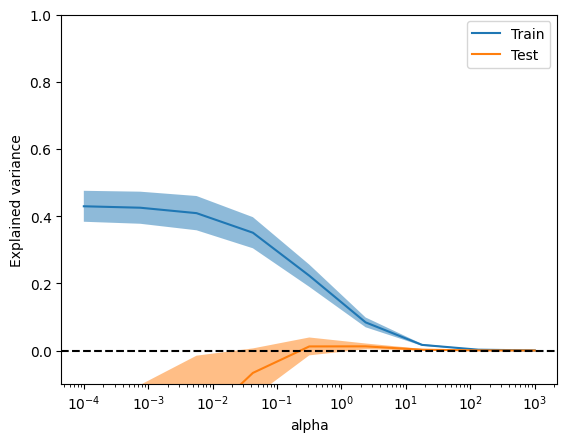

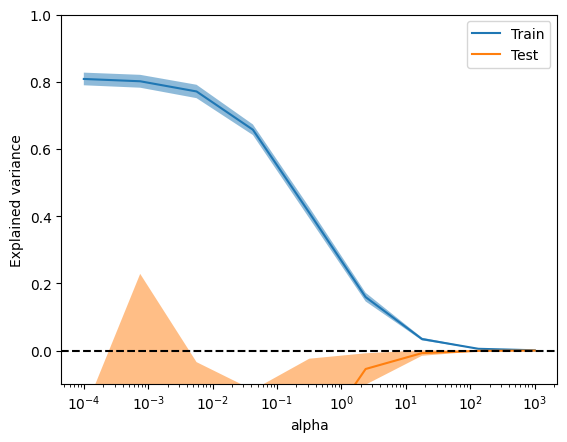

25841


In [276]:


print("Clay embeddings on NAIP imagery")
ax = plt.subplot()
weighted_val_curve(Ridge, encodings_data, filtered_data.bray_adj, filtered_data.weights, alphas, filtered_data.SS, ax=ax)
plt.axhline(0, color='black', linestyle='--')
ax.set_ylim(-.1, 1)
plt.show()
ax = plt.subplot()
weighted_val_curve(Ridge, encodings_data, filtered_data.ln_relative_abundance, filtered_data.weights, alphas, filtered_data.SS, ax=ax)
plt.axhline(0, color='black', linestyle='--')
ax.set_ylim(-.1, 1)
plt.show()

print(len(encodings_data))

LAND USE ONLY


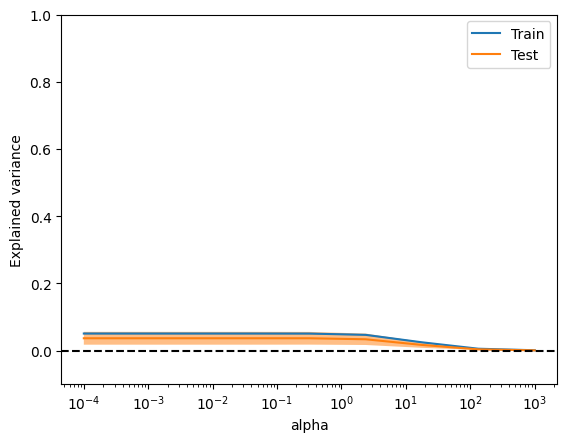

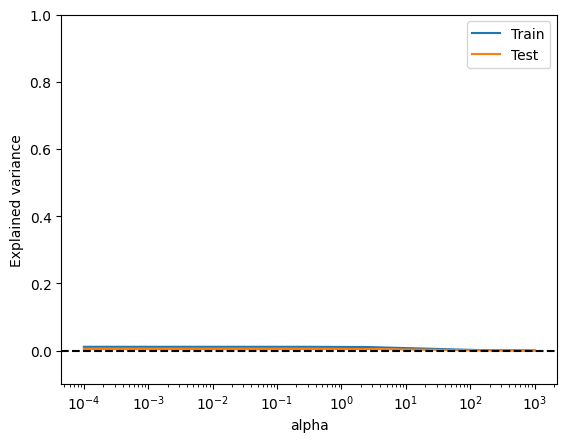

{'Cropland': -0.11340502408003163,
 'Pasture': -0.10215503013459644,
 'Plantation forest': -0.061527913690237045,
 'Primary vegetation': -0.03155464050806997,
 'Secondary vegetation': -0.05013526540992583,
 'Urban': -0.09344249802744421}
{'Cropland': -0.20935482121586407,
 'Pasture': -0.19960740232201296,
 'Plantation forest': -0.17150109049247805,
 'Primary vegetation': -0.10336737173182035,
 'Secondary vegetation': -0.12320408018933753,
 'Urban': -0.06969707084529042}
576083


In [282]:
from pprint import pprint
print("LAND USE ONLY")
data = all_data
dummyvars = pd.get_dummies(data.s2_lu, drop_first=True)

ax = plt.subplot()
weighted_val_curve(Ridge, dummyvars, data.bray_adj, data.weights, alphas, data.SS, ax=ax)
plt.axhline(0, color='black', linestyle='--')
ax.set_ylim(-.1, 1)
plt.show()
ax = plt.subplot()
weighted_val_curve(Ridge, dummyvars, data.ln_relative_abundance, data.weights, alphas, data.SS, ax=ax)
plt.axhline(0, color='black', linestyle='--')
ax.set_ylim(-.1, 1)
plt.show()

mdl = Ridge(alpha=1)
mdl.fit(dummyvars, data.bray_adj, sample_weight=data.weights)
pprint(dict(zip(dummyvars.columns, mdl.coef_)))

mdl = Ridge(alpha=1)
mdl.fit(dummyvars, data.ln_relative_abundance, sample_weight=data.weights)
pprint(dict(zip(dummyvars.columns, mdl.coef_)))

print(len(all_data))

In [344]:

bray_model = sklearn.linear_model.Ridge(alpha=1)
#bray_model = sklearn.svm.SVR()
bray_model.fit(encodings_data, filtered_data.bray_adj, sample_weight=filtered_data.weights)

ab_model = sklearn.linear_model.Ridge(alpha=10)
#ab_model = sklearn.svm.SVR()
ab_model.fit(encodings_data, filtered_data.ln_relative_abundance, sample_weight=filtered_data.weights)

Ridge(alpha=10)

HW1_2007__Chapman 1 1 2_vs_HW1_2007__Chapman 1 2 42
Site embedding similarity (corr): 0.4953757721766093

Site 1 Primary vegetation, extent 200.0, taxon Aves 	Site 2 Primary vegetation, extent 200.0, taxon Aves
Site 1 coords 45.4625, -93.668		Site 2 coords 45.388, -93.17533
Nat comp. predicted: 0.03268842771649361,	actual: 0.2743764808579623		Nat comp. predicted: -9.714526822790504e-05,	actual: 0.24434294533617504
Abundance predicted: -0.08317632973194122,	actual: -0.4382993241658332		Abundance predicted: 0.0015430506318807602,	actual: 0.2992693659423819


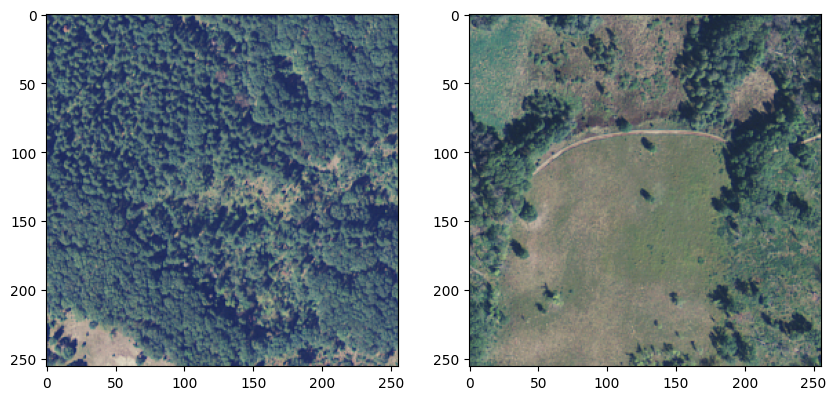

Actual difference:    Abundance: 🌲0.738, Nat comp: 🔻-0.030
Predicted difference: Abundance: 🌲0.085, Nat comp: 🔻-0.033


In [356]:

def _emoji(x):
    if x < -0.01:
        return f'🔻{x:.3f}'
    if x > 0.01:
        return f'🌲{x:.3f}'
    return f'🟡{x:.3f}'

def test_hold_idx(row):
    s1 = encoded_tiles.loc[row.s1]
    s2 = encoded_tiles.loc[row.s2]
    print(f"Site embedding similarity (corr): {np.corrcoef(s1, s2)[0, 1]}\n")
    s1meta = predicts_coords.loc[row.s1]
    s2meta = predicts_coords.loc[row.s2]

    a_bray1 = filtered_data[filtered_data.s2 == row.s1].bray.mean()
    a_abund1 = filtered_data[filtered_data.s2 == row.s1].ln_relative_abundance.mean()
    a_bray2 = filtered_data[filtered_data.s2 == row.s2].bray.mean()
    a_abund2 = filtered_data[filtered_data.s2 == row.s2].ln_relative_abundance.mean()

    p_bray1 = bray_model.predict(s1.values.reshape(1, -1))[0]
    p_abund1 = ab_model.predict(s1.values.reshape(1, -1))[0]
    p_bray2 = bray_model.predict(s2.values.reshape(1, -1))[0]
    p_abund2 = ab_model.predict(s2.values.reshape(1, -1))[0]

    print(f"Site 1 {s1meta.Predominant_land_use}, extent {s1meta.Max_linear_extent_metres}, taxon {s1meta.Study_common_taxon} " \
          f"\tSite 2 {s2meta.Predominant_land_use}, extent {s2meta.Max_linear_extent_metres}, taxon {s2meta.Study_common_taxon}")
    print(f"Site 1 coords {s1meta.Latitude}, {s1meta.Longitude}" \
          f"\t\tSite 2 coords {s2meta.Latitude}, {s2meta.Longitude}")
    print(f"Nat comp. predicted: {p_bray1},\tactual: {a_bray1}\t\tNat comp. predicted: {p_bray2},\tactual: {a_bray2}")
    print(f"Abundance predicted: {p_abund1},\tactual: {a_abund1}\t\tAbundance predicted: {p_abund2},\tactual: {a_abund2}")
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    with rio.open(f'../data/02_intermediate/naip_stacks_filtered/{row.s1}.tif') as src:
        rio.plot.show(src.read([1, 2, 3]), ax=axs[0])
    with rio.open(f'../data/02_intermediate/naip_stacks_filtered/{row.s2}.tif') as src:
        rio.plot.show(src.read([1, 2, 3]), ax=axs[1])
    plt.show()

    a_bray_change = _emoji(a_bray2 - a_bray1)
    p_bray_change = _emoji(p_bray2 - p_bray1)
    a_abund_change = _emoji(a_abund2 - a_abund1)
    p_abund_change = _emoji(p_abund2 - p_abund1)
    print(f"Actual difference:    Abundance: {a_abund_change}, Nat comp: {a_bray_change}")
    print(f"Predicted difference: Abundance: {p_abund_change}, Nat comp: {p_bray_change}")

row = filtered_data.loc[np.random.randint(0, len(filtered_data))]
print(row.contrast)
test_hold_idx(row)